## Project Wrangle and Analyze Data
### Wrangle and Analyze the WeRateDogs Twitter Archive
### Sherif Sakr
### Egypt, Cairo, 7 September 2020

In [548]:
# Dataset from Twitter archive of user @dog_rates, also known as WeRateDogs, 
# which is a Twitter account that rates people's dogs with a humorous comment about the dog.
# Only the original ratings not retweets that have images.
# There are more than five thousands tweets in the data set, not all are dog ratings and some are retweets.
# I do not need to gather the tweets beyond August 1, 2017, because i can not gather the image predictions for these tweets.
# since I can not have access to the algorithm used.
# Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and 
# demonstrate my skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least
# 8 quality issues and at least 2 tidiness issues in this dataset.
# Cleaning data including merging individual pieces of data according to the rules of tidy data.
# The fact that the rating numerators are greater than the denominators does not need to be clean. This unique rating system
# is a big part of the popularity of WeRateDogs.

#### The project Consists of five Stages
- First: Gathering data from three different sources, and three different format of files
- Second: Assess Data (Quality & Tidiness)
- Third: Clean data (Define, Code, Test)
- Fourth: Store data (Flat files and Database)
- Fifth: Analyze, Visualize, and Report    

# Data Wrangling, First Step: Gathering Data

In [2]:
# Import Python Packages (Libraries)

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

from io import BytesIO
from PIL import Image

import requests
import os
import re
import tweepy
import json
import time
import datetime
import random

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load dataset to Pandas DataFrame
# A comma-separated values (CSV) file is a delimited text file that uses a comma to separate values.
# A tab-separated values (TSV) file is a simple text format for storing data in a tabular structure, e.g., database table or spreadsheet data, and a way of exchanging information between databases.
# JSON file is a file that stores simple data structures and objects in JavaScript Object Notation (JSON) format, which is a standard data interchange format. It is primarily used for transmitting data between a web application and a server.

# `twitter-archive-enhanced.csv` file

In [5]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [6]:
# Using Google Sheets, Microsoft Excel and Pandas to apply a visual assessment alongside with programmatic assessment with codes

In [7]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
df_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [10]:
df_archive.iloc[0]

tweet_id                                                     892420643555336193
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-08-01 16:23:56 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Phineas. He's a mystical boy. Only eve...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/892420643...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

In [11]:
df_archive.in_reply_to_status_id

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2351   NaN
2352   NaN
2353   NaN
2354   NaN
2355   NaN
Name: in_reply_to_status_id, Length: 2356, dtype: float64

In [12]:
df_archive.in_reply_to_user_id

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2351   NaN
2352   NaN
2353   NaN
2354   NaN
2355   NaN
Name: in_reply_to_user_id, Length: 2356, dtype: float64

# `image-predictions.tsv` file 
- the tweet image predictions i.e., what breed of dog (or other object, animal, etc.) is presented in each tweet according to a neural network.
- the file ` image-predictions.tsv` is hosted on Udacity servers and I will downloaded  it programmatically using the Requests
library from the following URL:https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
- on the other hand, I may load the provided `image-predictions.tsv file into pandas dataframe by coding
df_predictions = pd.read_csv('image-predictions.tsv').

In [13]:
# Make directory if it does not already exist
folder_name = 'Udacity'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)


In [14]:
# Assigning the url string to available with an appropriate name
# Extract the file name from the url string (url) via the appropriate string method.
# Get a response object by applying the requests package (requests.get(url)).
# Http status code [200]> indicate that the requests has successfully downloaded the file
# write the content of the response object to a file using (with) context manager and specify the correct mode 'wb'.

In [15]:
udacity_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(udacity_url)
response

<Response [200]>

In [16]:
file_name = udacity_url.split('/')[-1]
with open (os.path.join('./', file_name), mode='wb') as file:
    file.write(response.content)

In [17]:
ls *.tsv

 Volume in drive C has no label.
 Volume Serial Number is 3E3C-6153

 Directory of C:\Users\hp

08/30/2020  11:19 AM             3,587 bestofrt.tsv
09/06/2020  08:20 PM           335,079 image-predictions.tsv
               2 File(s)        338,666 bytes
               0 Dir(s)  150,302,195,712 bytes free


In [18]:
df_predictions = pd.read_csv('image-predictions.tsv', sep = '\\t', engine = 'python')
df_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [19]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
df_predictions.iloc[0]

tweet_id                                 666020888022790149
jpg_url     https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg
img_num                                                   1
p1                                   Welsh_springer_spaniel
p1_conf                                            0.465074
p1_dog                                                 True
p2                                                   collie
p2_conf                                            0.156665
p2_dog                                                 True
p3                                        Shetland_sheepdog
p3_conf                                           0.0614285
p3_dog                                                 True
Name: 0, dtype: object

In [21]:
df_predictions.shape

(2075, 12)

# `tweet-json.txt` file 
- Each tweet's retweet count and favorite ('like') count at minimum, any additional data you find interesting.
- Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's 
Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt. 
Each tweet's JSON data should be written to its own line.
- The I read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count and favorite count.
- I will not include my Twitter API keys, secrets and tokens in my project submission

In [22]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
    consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_archive is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Fail
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809:

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [23]:
ls tweet_json.txt

 Volume in drive C has no label.
 Volume Serial Number is 3E3C-6153

 Directory of C:\Users\hp

09/06/2020  09:16 PM        10,553,313 tweet_json.txt
               1 File(s)     10,553,313 bytes
               0 Dir(s)  150,297,432,064 bytes free


In [24]:
# Experimenting to extract one tweet's id information after creating an API object
exp_tweet = api.get_status(df_archive.tweet_id[1000], tweet_mode='extended')
content = exp_tweet._json
print(content)

{'created_at': 'Wed Jun 29 01:23:16 +0000 2016', 'id': 747963614829678593, 'id_str': '747963614829678593', 'full_text': 'PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts https://t.co/ZPfeRtOX0Q', 'truncated': False, 'display_text_range': [0, 70], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 747963600220917761, 'id_str': '747963600220917761', 'indices': [71, 94], 'media_url': 'http://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg', 'url': 'https://t.co/ZPfeRtOX0Q', 'display_url': 'pic.twitter.com/ZPfeRtOX0Q', 'expanded_url': 'https://twitter.com/dog_rates/status/747963614829678593/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 937, 'h': 632, 'resize': 'fit'}, 'small': {'w': 680, 'h': 459, 'resize': 'fit'}, 'large': {'w': 937, 'h': 632, 'resize': 'fit'}}}]}, 'extended_entities': {'media': [{'id': 74796

In [25]:
# Checking the keys of the test tweet through content.keys()
content.keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [26]:
# getting the retweet_count and favorite_count for the test tweet
content['retweet_count'], content['id'], content['favorite_count']

(2102, 747963614829678593, 5706)

In [27]:
content['user']['followers_count']

8852181

In [28]:
# Get a list of tweet_ids from the enhanced twitter archive to use for 
# downloading with the Twitter API

tweet_ids = df_archive.tweet_id.values
print("# of tweet_ids: " + str(len(tweet_ids)) + "\n")

count = 0
tweet_json_list = []
fails_dict = {}

start_time = time.time()

for tweet_id in tweet_ids:
    count += 1
    try:
        # attempt to get the tweet's JSON data and append to the tweet JSON list
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        tweet_json_list.append(tweet._json)
    except tweepy.TweepError as err:
        # save the error to the fail dictionary for review
        print("TweepError for id:  " + str(tweet_id))
        fails_dict[tweet_id] = err
        pass
    # To save space, only print out loop/tweet id for every 100th tweet
    if count % 100 == 0:
        print("loop # " + str(count))

elapsed_time = time.time() - start_time

elapsed_time_str = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
print("\nTime elapsed (HH:MM:SS):  " + elapsed_time_str + "\n")

# display list of tweets with errors
print("Number of TweepErrors:  {}\n".format(len(fails_dict)))
for tweet_id in fails_dict:
    print(tweet_id, fails_dict[tweet_id])


# of tweet_ids: 2356

TweepError for id:  888202515573088257
TweepError for id:  873697596434513921
loop # 100
TweepError for id:  872668790621863937
TweepError for id:  872261713294495745
TweepError for id:  869988702071779329
TweepError for id:  866816280283807744
TweepError for id:  861769973181624320
TweepError for id:  856602993587888130
loop # 200
TweepError for id:  851953902622658560
TweepError for id:  845459076796616705
TweepError for id:  844704788403113984
TweepError for id:  842892208864923648
TweepError for id:  837366284874571778
TweepError for id:  837012587749474308
loop # 300
TweepError for id:  829374341691346946
TweepError for id:  827228250799742977
loop # 400
loop # 500
TweepError for id:  812747805718642688
TweepError for id:  802247111496568832
loop # 600
loop # 700
TweepError for id:  779123168116150273
TweepError for id:  775096608509886464
loop # 800
TweepError for id:  771004394259247104
TweepError for id:  770743923962707968
TweepError for id:  759566828574

In [29]:
# Create the tweet_json.txt that contains each tweet's Json data in its own line.
# Save time when running the whole notebook, save Json data to a file
# Use the with context manager
# Save Json data in the list to the output file
# dump the content of the tweet_json text file
# Write a new line character ('\n') in the file after dumping
errors = []
if not os.path.isfile('tweet_json.txt'):
    # Create the file and write on it.
    with open ('tweet_json.txt','w') as file:
        for tweet_id in df_archive['tweet_id']:
            try:
                status = api.get_status(tweet_id, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, tweet_mode='extended')
                json.dump(status._json, file)
                file.write('\n')
            except Exceptions as e:
                print('Error on tweet id {}'.format(tweet_id) + ';' + str(e))
                errors.append(tweet_id)


In [30]:
# Read in .txt file lineby line into a Pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count
# Each line carries a tweet's data that can is in the form of python dict object.
# Each tweet's data (dict) can then be used to build a list of dictionaries.
# From each tweet's data we can access the values of the dictionary keys by using square brackets.

tweet_json_data = []

with open('tweet_json.txt', 'r') as json_file:
    # read the first line to start the loop
    line = json_file.readline()
    while line:
        data = json.loads(line)

        # extract variables from the JSON data
        data_id = data['id']
        data_retweet_count = data['retweet_count']
        data_favorite_count = data['favorite_count']
        
        # create a dictionary with the JSON data, then add to a list
        json_data = {'tweet_id': data_id, 
                     'retweet_count': data_retweet_count, 
                     'favorite_count': data_favorite_count
                    }
        tweet_json_data.append(json_data)

        # read the next line of JSON data
        line = json_file.readline()
        # ----- while -----

# convert the tweet JSON data dictionary list to a DataFrame
df_tweet_extra = pd.DataFrame(tweet_json_data, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])

df_tweet_extra.head(30)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7552,35729
1,892177421306343426,5599,30873
2,891815181378084864,3708,23220
3,891689557279858688,7736,39031
4,891327558926688256,8334,37274
5,891087950875897856,2795,18796
6,890971913173991426,1815,10921
7,890729181411237888,16898,60217
8,890609185150312448,3849,25849
9,890240255349198849,6572,29518


In [31]:
df_tweet_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2330 non-null   int64
 1   retweet_count   2330 non-null   int64
 2   favorite_count  2330 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [32]:
df_tweet_extra.to_csv('tweet_extra.csv', index= False)

In [33]:
# On the other hand, I can accessing project Data without a Twitter API Account via (tweet_json_2.txt file),
# and locate the file using command line code ls tweet_json_2

In [34]:
ls tweet_json_2.txt

 Volume in drive C has no label.
 Volume Serial Number is 3E3C-6153

 Directory of C:\Users\hp

09/03/2020  02:37 PM        10,609,234 tweet_json_2.txt
               1 File(s)     10,609,234 bytes
               0 Dir(s)  150,301,704,192 bytes free


In [35]:
print('-'*120)

------------------------------------------------------------------------------------------------------------------------


# Data Wrangling, Second Step: Assessing Data

In [252]:
#import Python packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

from io import BytesIO
from PIL import Image

import requests
import os
import re
import tweepy
import json
import time
import datetime
import random

import warnings
warnings.filterwarnings('ignore')

###### There are two types of Data Assessment:
- Visual assessment: the three datasets (gathered data) is displayed in the Jupyter Notebook for visual assessment purposes, 
    once displayed, data can additionally be assessed in an extra applications such as Microsoft Excel, Google Sheets, and 
    Text editor.
- Programmatic assessment: using Pandas' functions and methods.    

In [253]:
# Load datasets from three different sources and three diffierent format into pandas dataframe
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_predictions = pd.read_csv('image-predictions.tsv', sep= '\\t', engine= 'python')
df_json = pd.read_csv('tweet_extra.csv')

##### Properties of data
- Quality: low quality data is commonly referred to as dirty data.
- which dirty data has issues with content such as missing data, invalid data, inaccurate data and inconsistent data.
- Tidiness: untidy data is commonly referred to as messy data, which messy data has issues with its structure.
- Tidy data is: Each variable forms a column, each observation forms a row, and each observation unit forms a table.
- Data Quality Dimensions: there are four main data quality dimensions (completeness, validity, accuracy and consistency)

### `twitter-archive-enhanced.csv` table  

In [254]:
# Viewing the shape of the df_archive
df_archive.shape

(2356, 17)

In [255]:
# Viewing the dimensions of the df_archive
df_archive.ndim

2

In [256]:
# Viewing the type of the df_archive
type(df_archive)

pandas.core.frame.DataFrame

In [257]:
# Viewing the total elements of the df_archive
df_archive.size

40052

In [258]:
# Viewing the row index in the df_archive
df_archive.index

RangeIndex(start=0, stop=2356, step=1)

In [259]:
# Viewing the column index in the df_archive
df_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [260]:
# Use the list() method to viewing the column names in Pandas DataFrame
list(df_archive)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [261]:
# Viewing the information about the df_archive
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [262]:
df_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [263]:
# Viewing the first fifteen few rows of the df_archive
# Checking the doggo, floofer, pupper, puppo columns!
df_archive.head(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [264]:
# View the last fifteen few rows of the df_archive
df_archive.tail(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2341,666094000022159362,NaN,NaN,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This appears to be a Mongolian Presbyterian mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666094000...,9,10,None,None,None,None,None
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None


In [265]:
# Checking the name column value counts:
# Is the name was correctly extracted from the tweet's text?
# What about the weird values, None values, etc.?
df_archive.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
           ... 
Dylan         1
Edgar         1
Beemo         1
Sunshine      1
Chuq          1
Name: name, Length: 957, dtype: int64

In [266]:
df_archive.loc[df_archive['name'] == 'not']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
988,748977405889503236,NaN,NaN,2016-07-01 20:31:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What jokester sent in a pic without a dog in i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748977405...,10,10,not,None,None,None,None


In [267]:
df_archive.loc[df_archive['name'] == 'an']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None
1362,703041949650034688,NaN,NaN,2016-02-26 02:20:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an East African Chalupa Seal. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
2204,668636665813057536,NaN,NaN,2015-11-23 03:46:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Irish Rigatoni terrier named Berta....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668636665...,10,10,an,None,None,None,None
2333,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None


In [268]:
# List all erroneous names which are lowercase
error_names = df_archive.name.str.contains('^[a-z]',regex=True)
df_archive[error_names].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [269]:
print('The name column has invalid names of tweets equal',format(len(df_archive[error_names])))

The name column has invalid names of tweets equal 109


In [270]:
# Number of missing data in expanded_urls column
df_archive.expanded_urls.isnull().sum()

59

In [271]:
# How many tweets with missing urls are replies or retweets?
sum(df_archive.expanded_urls.isnull() & \
   (df_archive.in_reply_to_status_id.notnull()|\
   df_archive.retweeted_status_id.notnull()))

56

In [272]:
# Display tweets that are missing urls and neither replies nor retweets
mask = df_archive.expanded_urls.isnull() & \
   (df_archive.in_reply_to_status_id.isnull()& \
   df_archive.retweeted_status_id.isnull())
df_archive[mask][['tweet_id','text','expanded_urls']]

,tweet_id,text,expanded_urls
375,828361771580813312,Beebop and Doobert should start a band 12/10 w...,NaN
707,785515384317313025,"Today, 10/10, should be National Dog Rates Day",NaN
1445,696518437233913856,Oh my god 10/10 for every little hot dog pupper,NaN


In [273]:
# There are 59 tweets (missing data) in the expanded_urls, there are 56 replies or tweets of them and the remaining three
# of them with indexes of 375, 707, and 1445 with values of NaN in the expanded_urls column, all have valid ratings but 
# not urls with the text column.
# The question is "Is any of these tweets in df_predictions table or df_jason table?"

In [274]:
# Are any of these tweets in the df_predictions table
tweets_set = [828361771580813312,785515384317313025,696518437233913856]
find_tweet_id = df_predictions.tweet_id.isin(tweets_set)
sum(find_tweet_id)

0

In [275]:
# Are any of these tweets in the df_json table
tweets_set = [828361771580813312,785515384317313025,696518437233913856]
find_tweet_id = df_json.tweet_id.isin(tweets_set)
sum(find_tweet_id)

3

In [276]:
# Checking rating values, their count, mean, standard deviation, minimum, maximum, and quartiles (the five-number summary)
# Descriptive ststistics, describe() method [rating numerator and denominator]
df_archive[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [277]:
df_archive.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [278]:
sum(df_archive.rating_denominator != 10)

23

In [279]:
# It's interesting that many of the larger numbers are multiples of 10. 
# When looking at some of those tweets we see that there is more than 1 dog in the photo. 
# Ignoring the retweets and replies we have the following list.

In [280]:
mask_find = (df_archive.rating_denominator != 10) &\
             df_archive.in_reply_to_status_id.isnull() &\
             df_archive.retweeted_status_id.isnull()
mask_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
df_archive[mask_find][mask_cols]

,text,tweet_id,rating_numerator,rating_denominator
433,The floofs have been released I repeat the flo...,820690176645140481,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,810984652412424192,24,7
902,Why does this never happen at my front door......,758467244762497024,165,150
1068,"After so many requests, this is Bretagne. She ...",740373189193256964,9,11
1120,Say hello to this unbelievably well behaved sq...,731156023742988288,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,722974582966214656,4,20
1202,This is Bluebert. He just saw that both #Final...,716439118184652801,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99...,713900603437621249,99,90
1254,Here's a brigade of puppers. All look very pre...,710658690886586372,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro...",709198395643068416,45,50


In [281]:
sum(mask_find)

17

In [282]:
# Ignoring the replies and retweets, there are 17 tweets with denominators that aren't 10.
# Many of these which are multiples of 10 are about multiple dogs, and the text indicates this,
# like "floofs", "puppers", "squad" and "pups".
# I'll just drop the tweets for multiples, but I'll reset the rating for single dogs.

In [283]:
df_archive.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [284]:
sum(df_archive.rating_numerator >= 15)

28

In [285]:
df_tweets_denom_10 = df_archive[df_archive.rating_denominator == 10]
df_tweets_denom_10.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
666       1
420       2
182       1
75        2
27        1
26        1
17        1
15        2
14       54
13      351
12      558
11      463
10      461
9       156
8       102
7        54
6        32
5        37
4        15
3        19
2         9
1         8
0         2
Name: rating_numerator, dtype: int64

In [286]:
sum(df_tweets_denom_10.rating_numerator >= 15)

12

In [287]:
#Looking ONLY at tweets that have denominators = 10, there are 12 with numerators >= 15. 
# I chose 15 as the lower boundary because it's got just 2 counts, while 14 has a count of 54. 
# We can check the texts to see if the numerator makes sense.
# NOTE: The next queries ignore retweets and replies.

In [288]:
# display tweets with numerator >= 15 that DO have denominator of 10,
# and are NOT replies and are NOT retweets
mask_find = (df_archive.rating_denominator == 10) & \
            (df_archive.rating_numerator >= 15) & \
            df_archive.in_reply_to_status_id.isnull() & \
            df_archive.retweeted_status_id.isnull()

mask_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
df_archive[mask_find][mask_cols]

,text,tweet_id,rating_numerator,rating_denominator
695,"This is Logan, the Chow who lived. He solemnly...",786709082849828864,75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,778027034220126208,27,10
979,This is Atticus. He's quite simply America af....,749981277374128128,1776,10
1712,Here we have uncovered an entire battalion of ...,680494726643068929,26,10
2074,After so many requests... here you go.\n\nGood...,670842764863651840,420,10


In [289]:
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [290]:
# There are four types of sources ('Twitter fo iphone','Make s Scene', 'Twitter Web Client', and 'TweetDeck')

In [291]:
# Use a Pandas Index.value_counts() function returns object containing counts of unique values.
# The resulting object will be in descending order so that the first element is the most frequently-occurring element.
# Excludes NA values by default.

In [292]:
df_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [293]:
df_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [294]:
df_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [295]:
df_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [296]:
df_archive[df_archive.floofer == 'floofer'].text

46      Meet Grizzwald. He may be the floofiest floofe...
200     At first I thought this was a shy doggo, but i...
582     This is Doc. He takes time out of every day to...
774     Atlas rolled around in some chalk and now he's...
984     This is Blu. He's a wild bush Floofer. I wish ...
1022    Here's a golden floofer helping with the groce...
1091    Just wanted to share this super rare Rainbow F...
1110    This is Moose. He's a Polynesian Floofer. Dapp...
1534    Here we are witnessing a rare High Stepping Al...
1614    Say hello to Petrick. He's an Altostratus Floo...
Name: text, dtype: object

In [297]:
df_archive[df_archive['text'].str.contains('floofer')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,None,None
582,800388270626521089,NaN,NaN,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,None,floofer,None,None
774,776218204058357768,NaN,NaN,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776218204...,13,10,None,None,floofer,None,None
1022,746542875601690625,NaN,NaN,2016-06-25 03:17:46 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a golden floofer helping with the groce...,NaN,NaN,NaN,https://vine.co/v/5uZYwqmuDeT,11,10,None,None,floofer,None,None


In [298]:
df_archive.retweeted_status_id

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2351   NaN
2352   NaN
2353   NaN
2354   NaN
2355   NaN
Name: retweeted_status_id, Length: 2356, dtype: float64

In [299]:
df_archive.retweeted_status_id.isnull().sum()

2175

In [300]:
df_archive['retweeted_status_id'].isnull().count()

2356

### `image-predictions.tsv` table

In [301]:
# Viewing the dimensions of the df_predictions
df_predictions.ndim

2

In [302]:
# Viewing the type of the df_predictions
type(df_predictions)

pandas.core.frame.DataFrame

In [303]:
# Viewing the shape of the df_predictions
df_predictions.shape

(2075, 12)

In [304]:
# Viewing the size of the df_predictions
df_predictions.size

24900

In [305]:
# Viewing the row index in the df_predictions
df_predictions.index

RangeIndex(start=0, stop=2075, step=1)

In [306]:
# Viewing the column index in the df_predictions
df_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [307]:
# Use the list() method to view the column names in the Pandas DataFrame
list(df_predictions)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [308]:
# Viewing the information about the df_predictions
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [309]:
# Viewing the first few rows of the df_predictions
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [310]:
#Checking duplicated in 'jpg_url' column
df_predictions['jpg_url'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2070    False
2071    False
2072    False
2073    False
2074    False
Name: jpg_url, Length: 2075, dtype: bool

In [311]:
sum(df_predictions['jpg_url'].duplicated())

66

In [312]:
# Viewing the last few rows of the df_predictions
df_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [313]:
# Checking the p1_dog, p2_dog, p3_dog columns about the prediction of bread of dog (boolean)

In [314]:
df_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [315]:
df_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [316]:
df_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [317]:
# Check all entries that do not predict dogs
df_predictions[~df_predictions.p1_dog &\
              ~df_predictions.p2_dog &\
              ~df_predictions.p3_dog][['tweet_id','p1','p1_dog','p2','p2_dog','p3','p3_dog']]

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
6,666051853826850816,box_turtle,False,mud_turtle,False,terrapin,False
17,666104133288665088,hen,False,cock,False,partridge,False
18,666268910803644416,desktop_computer,False,desk,False,bookcase,False
21,666293911632134144,three-toed_sloth,False,otter,False,great_grey_owl,False
25,666362758909284353,guinea_pig,False,skunk,False,hamster,False
...,...,...,...,...,...,...,...
2021,880935762899988482,street_sign,False,umbrella,False,traffic_light,False
2022,881268444196462592,tusker,False,Indian_elephant,False,ibex,False
2046,886680336477933568,convertible,False,sports_car,False,car_wheel,False
2052,887517139158093824,limousine,False,tow_truck,False,shopping_cart,False


In [318]:
sum(~df_predictions.p1_dog &\
   ~df_predictions.p2_dog &\
   ~df_predictions.p3_dog)

324

In [319]:
# There are 324 cases where there is no valid dogs breed from any of the three image predictions

In [320]:
# Checking the confidence of each prediction ('p1_conf', 'p2_conf', 'p3_conf') statistically
df_predictions[['p1_conf','p2_conf','p3_conf']].describe()

,p1_conf,p2_conf,p3_conf
count,2075.000000,2.075000e+03,2.075000e+03
mean,0.594548,1.345886e-01,6.032417e-02
std,0.271174,1.006657e-01,5.090593e-02
min,0.044333,1.011300e-08,1.740170e-10
25%,0.364412,5.388625e-02,1.622240e-02
50%,0.588230,1.181810e-01,4.944380e-02
75%,0.843855,1.955655e-01,9.180755e-02
max,1.000000,4.880140e-01,2.734190e-01


##### `tweet_extra.csv` file

In [321]:
# Viewing the dimensions of the df_json
df_json.ndim

2

In [322]:
# Viewing the type of the df_json
type(df_json)

pandas.core.frame.DataFrame

In [323]:
# Viewing the total elements of size of the df_json
df_json.size

6990

In [324]:
# Viewing the shape of the df_json
df_json.shape

(2330, 3)

In [325]:
# Viewing the row index in the df_json
df_json.index

RangeIndex(start=0, stop=2330, step=1)

In [326]:
# Viewing the column index in the df_json
df_json.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

In [327]:
# Use the list() method to view the column names in Pandas DataFrame
list(df_json)

['tweet_id', 'retweet_count', 'favorite_count']

In [328]:
# viewing the first few rows of the df_json
df_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7552,35729
1,892177421306343426,5599,30873
2,891815181378084864,3708,23220
3,891689557279858688,7736,39031
4,891327558926688256,8334,37274


In [329]:
# Viewing the last few rows of the df_json
df_json.tail()

,tweet_id,retweet_count,favorite_count
2325,666049248165822465,40,96
2326,666044226329800704,127,265
2327,666033412701032449,40,111
2328,666029285002620928,42,120
2329,666020888022790149,457,2381


In [330]:
# Viewing the information about the df_json
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2330 non-null   int64
 1   retweet_count   2330 non-null   int64
 2   favorite_count  2330 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [331]:
# Checking the 'retweet_count' and 'favorite_count' columns statistically by using the describe() method
df_json[['retweet_count','favorite_count']].describe()

,retweet_count,favorite_count
count,2330.000000,2330.000000
mean,2656.504292,7466.380687
std,4492.585655,11591.819601
min,1.000000,0.000000
25%,539.000000,1297.500000
50%,1243.000000,3244.500000
75%,3086.000000,9146.250000
max,76323.000000,154053.000000


## Data Assessing, Assessment Summary

### <center>`twitter-archive-enhanced` table</center>

#####  Quality (Completence) issues

In [332]:
# There are 181 retweets of total 2356 on retweeted_status_id column,indicating 2175 retweets with missing data.
# There are 181 retweets of total 2356 on retweeted_status_user_id column,indicating 2175 retweets with missing data.
# There are 181 retweets of total 2356 on retweeted_status_timestamp,indicating 2175 retweets with missing data.

In [333]:
# There are 78 replies of total 2356 on in_reply_to_status_id column of non null values. 
# There are 78 replies of total 2356 on in_reply_to_user_id column of non-null values.

In [334]:
# There are tweets with missing data in the expanded_urls column

##### Quality (consistency) issues

In [335]:
# The 'tweet_id' column is integer data type and need to change into string data type

In [336]:
# The 'in_reply_to_status_id' column is float data type and need to change into string data type

In [337]:
# The 'in_reply_to_user_id' column is float data type and need to change into string data type

In [338]:
# the 'rating_numerator' column data type needed to change from integer into float.

In [339]:
# The timestamp column has data type (object) in string format.

In [340]:
# the 'source' column can be simplified by extracting and replacing a suitable string from it

In [341]:
# There four columns for dog stages (doggo, floofer, pupper, and puppo)

In [342]:
# Drop the columns 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp'

In [343]:
# Drop the columns 'in_reply_to_status_id', 'in_reply_to_user_id'

In [344]:
# Drop the column 'extended_urls'

In [345]:
# Extract the values for 'rating_numerator', 'rating_denominator' columns from 'text' columns

In [346]:
# Create a new column 'ratings' in the df_archive_clean equal 'rating_numerator' / 'rating_denominator' (cancelled)

In [347]:
# the new column'ratings' need to be a float data type. (cancelled)

In [348]:
# Changing the name of 'rating_numerator' column  into 'rating.

In [349]:
# Melt the columns 'doggo','floofer','pupper', 'puppo' to dogs and dogs_stage column

In [350]:
# Change the data type of the new column 'dogs_stage' into category datatype.

#####  Quality ( Accuracy) issues

In [351]:
# There are many invalid names such as 'a', 'an', 'not' besides the value 'none' in the name column

In [352]:
# There are many wrong values in 'rating_denominator' column not equal to 10.
# there are many wrong values in 'rating_numerator' column greater than 15.

In [353]:
# Drop tweets with missing data in 'retweet_count' and 'favorite_count' column at df_archive_clean table,
# after merge the df_json_clean table with df_archive_clean

In [354]:
# Change the data type for the 'retweet_count' and 'favorite_count' at df_archive_clean table to be integer data type

### <center> `image-predictions ` table</center>

##### Quality (consistency) issue

In [355]:
# The 'tweet_id' column is integer data type and need to change into string data type

In [356]:
# Drop the columns 'img_num' 'p2', 'p2_conf', 'p2_dog','p3', 'p3_conf', 'p3_dog'

In [357]:
# Rename some of columns at df_predictions table

#### Quality (Accuracy) issues

In [358]:
# There are 66 cases of duplicates in 'jpg_url' column in df_prediction table

In [359]:
# Replace the underscores from the columns 'p1','p2','p3' by spaces

#### Tidiness Issues

In [360]:
# Merge the df_prediction table to df_archive table

##### Quality (completeness) Issues

In [361]:
# There are 2075 image predictions, 281 less than the number of tweets in the archive, missing data

### <center>`tweet_json`table</center>

##### Quality (consistency) issues

In [362]:
# The 'tweet_id' column is integer data type and need to change into string data type

In [363]:
# The 'retweet_count' column is integer data type and need to change into float data type

In [364]:
# The 'favorite_count' column is integer data type and need to change into float data type

#### Tidiness Issues

In [365]:
# Merge the df_json table ('retweet_count' and 'favorite_count') with df_archive table

In [366]:
print('-'*120)

------------------------------------------------------------------------------------------------------------------------


# Data Wrangling, Third Step: Cleaning Data

In [468]:
# Reload datasets into pandas DataFrames
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_predictions = pd.read_csv('image-predictions.tsv', sep='\\t', engine='python')
df_json = pd.read_csv('tweet_extra.csv')

In [469]:
# Create copies of the three dataframes for cleaning purposes:

In [470]:
df_archive_clean = df_archive.copy()

In [471]:
df_predictions_clean = df_predictions.copy()

In [472]:
df_json_clean = df_json.copy()

### <center>`df_archive_clean`</center>

#### Quality

In [473]:
# Change the 'tweet_id' column data type from integer into string

##### Define

In [474]:
# Change the 'tweet_id' column data type from integer into string
# Use a Pandas.DataFrame.astype() function
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

##### Code

In [475]:
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(str)

##### Test

In [476]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [477]:
# the 'rating_numerator' column data type needed to change from integer into float.

#### Define

In [478]:
# the 'rating_numerator' column data type needed to change from integer into float.
# Use a Pandas.DataFrame.astype() function
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

##### Code

In [479]:
df_archive_clean['rating_numerator'] = df_archive_clean['rating_numerator'].astype(float)

##### Test

In [480]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   float64
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [481]:
# there are 181 retweets of total 2356 of columns 'retweeted_status_id','retweeted_status_user_id', 
# and 'retweeted_ststus_timestamp' are non-null and needed to be deleted (drop).

##### Define

In [482]:
# Drop all non-null values on columns 'retweeted_status_id','retweeted_status_user_id',and 'retweeted_ststus_timestamp' 
# Use DataFrame.isna() for delete missing values.

##### Code

In [483]:
sum(df_archive_clean.retweeted_status_id.notnull())

181

In [484]:
sum(df_archive_clean.retweeted_status_user_id.notnull())

181

In [485]:
sum(df_archive_clean.retweeted_status_timestamp.notnull())

181

In [486]:
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_id.isna()]

In [487]:
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_user_id.isna()]

In [488]:
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_timestamp.isna()]

##### Test

In [489]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   float64
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [490]:
# there are 78 reply tweets of total 2356 of columns 'in_reply_to_status_id', and'in_reply_to_user_id',
# are non-null values and needed to be deleted (drop).

##### Define

In [491]:
# Drop all non-null values on columns 'in_reply_to_status_id', and 'in_reply_to_user_id' .
# Use DataFrame.isna() for delete missing values.

##### Code

In [492]:
sum(df_archive_clean.in_reply_to_status_id.notnull())

78

In [493]:
sum(df_archive_clean.in_reply_to_user_id.notnull())

78

In [494]:
df_archive_clean = df_archive_clean[df_archive_clean.in_reply_to_status_id.isna()]

In [495]:
df_archive_clean = df_archive_clean[df_archive_clean.in_reply_to_user_id.isna()]

##### Test

In [496]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   object 
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   float64
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [497]:
# The 'timestamp' column is in string format.

##### Define

In [498]:
# Convert "timestamp" column from string to datetime data type
# Use Pandas.to_datetime() function to return datetime
# Use Pandas.Series.dt.floor() function, the frequency level to floor the index to 'S' (second). 

##### Code

In [499]:
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean.timestamp)
df_archive_clean['timestamp'] = df_archive_clean.timestamp.dt.floor('s')

##### Test

In [500]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   float64         

In [501]:
# The 'source' column, will be extracted and replaced with clear string

##### Define

In [502]:
# Extract the string between '<a href=', '>', and '</a' from the source column.
# Use Pandas.str.extract() to extract capture groups in the regex pat as columns in the DataFrame.
df_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

##### Code

In [503]:
df_archive_clean['source'] = df_archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

##### Test

In [504]:
df_archive_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [505]:
# Drop the tweets with missing data in the expanded_url column

##### Define

In [506]:
# Drop the tweets with missing data in the expanded_urls column.
# Use the Pandas.notnull() function to detect non-missing values for an array-like object.
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   float64         

##### Code

In [507]:
df_archive_clean = df_archive_clean[df_archive_clean.expanded_urls.notnull()]

##### Test

In [508]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2094 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2094 non-null   datetime64[ns, UTC]
 4   source                      2094 non-null   object             
 5   text                        2094 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2094 non-null   float64         

In [509]:
# There are many invalid names such as 'a', 'an', 'not', etc. in the name column besides the value"none"

##### Define

In [510]:
# Replace all lowercase words in the name column with the string "none"
names_mask = df_archive_clean.name.str.contains('^[a-z]',regex=True)
df_archive_clean[names_mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
this             1
unacceptable     1
very             4
Name: name, dtype: int64

##### Code

In [511]:
# Change all the lowercase entries in names_mask to 'none'
df_archive_clean.loc[names_mask, 'name'] = 'none'

##### Test

In [512]:
df_archive_clean[names_mask].name.value_counts().sort_index()

none    104
Name: name, dtype: int64

In [513]:
df_archive_clean.name.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2351     True
2352     True
2353     True
2354     True
2355     True
Name: name, Length: 2094, dtype: bool

In [514]:
sum(df_archive_clean.name.duplicated())

1163

In [515]:
# there are many wrong values in 'rating_denominator' column not equal to 10
# there are many wrong values in 'rating_numerator' column greater than 15.

##### Define

In [516]:
mask_find = (df_archive_clean.rating_denominator != 10) &\
            (df_archive_clean.rating_numerator >= 15)
mask_cols = ['tweet_id','text','rating_numerator','rating_denominator']
df_archive_clean[mask_find][mask_cols]

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the flo...,84.0,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24.0,7
902,758467244762497024,Why does this never happen at my front door......,165.0,150
1120,731156023742988288,Say hello to this unbelievably well behaved sq...,204.0,170
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,50.0,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,99.0,90
1254,710658690886586372,Here's a brigade of puppers. All look very pre...,80.0,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro...",45.0,50
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll ...,60.0,50
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40...,44.0,40


##### Code

In [517]:
mask_row = df_archive_clean.tweet_id == 820690176645140481
df_archive_clean.loc[mask_row,'rating_numerator'] = 12
df_archive_clean.loc[mask_row,'rating_denominator'] = 10

In [518]:
mask_row = df_archive_clean.tweet_id == 810984652412424192
df_archive_clean.loc[mask_row,'rating_numerator'] = 15
df_archive_clean.loc[mask_row,'rating_denominator'] = 10

In [519]:
mask_row = df_archive_clean.tweet_id == 758467244762497024
df_archive_clean.loc[mask_row,'rating_numerator'] = 15
df_archive_clean.loc[mask_row,'rating_denominator'] = 10

In [520]:
mask_row = df_archive_clean.tweet_id == 731156023742988288
df_archive_clean.loc[mask_row,'rating_numerator'] = 15
df_archive_clean.loc[mask_row,'rating_denominator'] = 10

In [521]:
mask_row = df_archive_clean.tweet_id == 716439118184652801
df_archive_clean.loc[mask_row,'rating_numerator'] = 10
df_archive_clean.loc[mask_row,'rating_denominator'] = 10

In [522]:
mask_row = df_archive_clean.tweet_id == 713900603437621249
df_archive_clean.loc[mask_row,'rating_numerator'] = 11
df_archive_clean.loc[mask_row,'rating_denominator'] = 10

In [523]:
mask_row = df_archive_clean.tweet_id == 710658690886586372
df_archive_clean.loc[mask_row,'rating_numerator'] = 10
df_archive_clean.loc[mask_row,'rating_denominator'] = 10

In [524]:
mask_row = df_archive_clean.tweet_id == 709198395643068416
df_archive_clean.loc[mask_row,'rating_numerator'] = 9
df_archive_clean.loc[mask_row,'rating_denominator'] = 10

In [525]:
mask_row = df_archive_clean.tweet_id == 704054845121142784
df_archive_clean.loc[mask_row,'rating_numerator'] = 12
df_archive_clean.loc[mask_row,'rating_denominator'] = 10

In [526]:
mask_row = df_archive_clean.tweet_id == 697463031882764288
df_archive_clean.loc[mask_row,'rating_numerator'] = 11
df_archive_clean.loc[mask_row,'rating_denominator'] = 10

In [527]:
mask_row = df_archive_clean.tweet_id == 684222868335505415
df_archive_clean.loc[mask_row,'rating_numerator'] = 11
df_archive_clean.loc[mask_row,'rating_denominator'] = 10

In [528]:
mask_row = df_archive_clean.tweet_id == 677716515794329600
df_archive_clean.loc[mask_row,'rating_numerator'] = 12
df_archive_clean.loc[mask_row,'rating_denominator'] = 10

In [529]:
mask_row = df_archive_clean.tweet_id == 675853064436391936
df_archive_clean.loc[mask_row,'rating_numerator'] = 11
df_archive_clean.loc[mask_row,'rating_denominator'] = 10

##### Test

In [530]:
mask_cols = ['tweet_id','text','rating_numerator','rating_denominator']
df_archive_clean[(df_archive_clean.tweet_id ==820690176645140481)|\
                (df_archive_clean.tweet_id == 810984652412424192)|\
                (df_archive_clean.tweet_id == 758467244762497024)|\
                (df_archive_clean.tweet_id == 731156023742988288)|\
                (df_archive_clean.tweet_id == 716439118184652801)|\
                (df_archive_clean.tweet_id == 713900603437621249)|\
                (df_archive_clean.tweet_id == 710658690886586372)|\
                (df_archive_clean.tweet_id == 709198395643068416)|\
                (df_archive_clean.tweet_id == 704054845121142784)|\
                (df_archive_clean.tweet_id == 697463031882764288)|\
                (df_archive_clean.tweet_id == 684222868335505415)|\
                (df_archive_clean.tweet_id == 677716515794329600)|\
                (df_archive_clean.tweet_id == 675853064436391936)][mask_cols]

,tweet_id,text,rating_numerator,rating_denominator


### <center>`df_predictions_clean`</center> 

##### Quality

In [531]:
# Change the 'tweet_id' column data type from ineger to string

###### Define

In [532]:
# Change the 'tweet_id' column data type from ineger to string
# Use a Pandas.DataFrame.astype() function
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### Code

In [533]:
df_predictions_clean['tweet_id'] = df_predictions_clean['tweet_id'].astype(str)

##### Test

In [534]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [535]:
# There are 66 cases of duplicates in 'jpg_url' column in df_prediction table

##### Define

In [536]:
# There are 66 cases of duplicates in 'jpg_url' column in df_prediction table
sum(df_predictions_clean['jpg_url'].duplicated())

66

##### Code

In [537]:
df_predictions_clean = df_predictions_clean.drop_duplicates(subset=['jpg_url'], keep='last')

##### Test

In [538]:
sum(df_predictions_clean['jpg_url'].duplicated())

0

#### Tidiness

##### Define

In [539]:
# Drop (delete) the columns 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp'
# Because  I do not want retweets and they will be empty.
# Using Dataframe.drop()

##### Code

In [540]:
df_archive_clean = df_archive_clean.drop(['retweeted_status_id',
                                          'retweeted_status_user_id',
                                          'retweeted_status_timestamp'], axis=1)

##### Test

In [541]:
list(df_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### Define

In [542]:
# Drop (delete) the columns 'in_reply_to_status_id', 'in_reply_to_user_id',
# Because  I do not want replies and they will be empty.
# Using Dataframe.drop()

#### Code

In [543]:
df_archive_clean = df_archive_clean.drop(['in_reply_to_status_id',
                                          'in_reply_to_user_id'], axis=1)

#### Test

In [544]:
list(df_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [545]:
# Drop (Delete) the column 'extended_urls'

##### Define

In [546]:
# Drop (Delete) the column 'extended_urls'
# Using Dataframe.drop()

##### Code

In [547]:
df_archive_clean = df_archive_clean.drop(['expanded_urls'], axis=1)

##### Test

In [548]:
list(df_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [549]:
# Extract the values for 'rating_numerator', 'rating_denominator' columns from 'text' columns

In [550]:
rating = df_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']

In [551]:
df_archive_clean [['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
0,13.0,10
1,13.0,10
2,12.0,10
3,13.0,10
4,12.0,10
...,...,...
2351,5.0,10
2352,6.0,10
2353,9.0,10
2354,7.0,10


In [552]:
# Create a new column 'ratings' in the df_archive_clean equal 'rating_numerator' / 'rating_denominator' (cancelled)

##### Define

In [553]:
# Create a new column 'ratings' in the df_archive_clean table equal 'rating_numerator' / 'rating_denominator' (cancelled)
# Using apply function to create a new column

##### Code

In [554]:
# df_archive_clean['ratings'] = df_archive_clean.apply(lambda x :x.rating_numerator /x.rating_denominator, axis=1) (cancelled)
# df_archive_clean.head()

In [555]:
# the new column'ratings' need to be a float data type. (cancelled)

##### Define

In [556]:
# the new column'ratings' need to be a float data type. (cancelled)
# Use a Pandas.DataFrame.astype() function

##### Code

In [557]:
# df_archive_clean['ratings'] = df_archive_clean['ratings'].astype(float) (cancelled)

###### Test

In [558]:
# df_archive_clean.info() (cancelled)

In [559]:
# Change the name of 'rating_numerator' column to 'rating'

##### Define

In [560]:
# Change the name of 'rating_numerator' column to 'rating'

##### Code

In [561]:
df_archive_clean = df_archive_clean.rename({'rating_numerator':'rating'}, axis='columns')

##### Test

In [562]:
list(df_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [563]:
# Melt the columns 'doggo','floofer','pupper', 'puppo' to dogs and dogs_stage column

##### Define

In [564]:
# Melt the columns 'doggo','floofer','pupper', 'puppo' to dogs and dogs_stage columns, by using Pandas.melt() function
# Then drop 'dogs',
# sort by 'dogs_stage' then drop duplicated based on 'tweet_id' except the last occurrence.

list(df_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

##### Code

In [566]:
df_archive_clean = pd.melt(df_archive_clean,id_vars=['tweet_id',
                                                     'timestamp',
                                                     'source',
                                                     'text',
                                                     'rating',
                                                     'rating_denominator',
                                                     'name'], var_name ='dogs', value_name ='dogs_stage')

In [567]:
list(df_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating',
 'rating_denominator',
 'name',
 'dogs',
 'dogs_stage']

In [568]:
df_archive_clean = df_archive_clean.drop('dogs', 1)

In [569]:
list(df_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating',
 'rating_denominator',
 'name',
 'dogs_stage']

In [570]:
df_archive_clean = df_archive_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', keep='last')

##### Test

In [571]:
df_archive_clean['dogs_stage'].value_counts()

None       1759
pupper      229
doggo        72
puppo        24
floofer      10
Name: dogs_stage, dtype: int64

In [572]:
# Change the data type of the new column 'dogs_stage' into category datatype.

##### Define

In [573]:
# Change the data type of the new column 'dogs_stage' into category datatype.
# Use the pandas.DataFrame.astype() function

##### Code

In [574]:
df_archive_clean['dogs_stage'] = df_archive_clean['dogs_stage'].astype('category')

##### Test

In [575]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 2017 to 6393
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   object             
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   rating              2094 non-null   float64            
 5   rating_denominator  2094 non-null   int64              
 6   name                2094 non-null   object             
 7   dogs_stage          2094 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int64(1), object(4)
memory usage: 133.1+ KB


In [576]:
# handle none
df_archive_clean.floofer.replace('None', '', inplace=True)
df_archive_clean.pupper.replace('None', '', inplace=True)
df_archive_clean.puppo.replace('None', '', inplace=True)
df_archive_clean.doggo.replace('None', '', inplace=True)

# merge into column
df_archive_clean['dogs_stage'] = df_archive_clean.doggo + df_archive_clean.floofer + df_archive_clean.pupper + df_archive_clean.puppo

# handle multiple stages
df_archive_clean.loc[df_archive_clean.dogs_stage == 'doggopupper', 'dogs_stage'] = 'doggo, pupper'
df_archive_clean.loc[df_archive_clean.dogs_stage == 'doggopuppo', 'dogs_stage'] = 'doggo, puppo'
df_archive_clean.loc[df_archive_clean.dogs_stage == 'doggofloofer', 'dogs_stage'] = 'doggo, floofer'

# handle missing values
df_clean.loc[df_archive_clean.dog_stage == '', 'dogs_stage'] = np.nan

AttributeError: 'DataFrame' object has no attribute 'floofer'

In [577]:
# Replace the underscores from the columns 'p1','p2','p3' by spaces
df_predictions_clean[['p1','p2','p3']]

,p1,p2,p3
0,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,malinois,bloodhound
3,Rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,Rottweiler,Doberman
...,...,...,...
2070,basset,English_springer,German_short-haired_pointer
2071,paper_towel,Labrador_retriever,spatula
2072,Chihuahua,malamute,kelpie
2073,Chihuahua,Pekinese,papillon


##### Define

In [578]:
# Replace the underscores from the columns 'p1','p2','p3' by spaces
# Use a pandas.DataFrame.rplace() function

##### Code

In [579]:
df_predictions_clean.p1 = df_predictions_clean.p1.str.replace('_',' ')
df_predictions_clean.p2 = df_predictions_clean.p2.str.replace('_',' ')
df_predictions_clean.p3 = df_predictions_clean.p3.str.replace('_',' ')

##### Test

In [580]:
df_predictions_clean[['p1','p2','p3']]

,p1,p2,p3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman
...,...,...,...
2070,basset,English springer,German short-haired pointer
2071,paper towel,Labrador retriever,spatula
2072,Chihuahua,malamute,kelpie
2073,Chihuahua,Pekinese,papillon


In [581]:
# Drop the columns 'img_num' 'p2', 'p2_conf', 'p2_dog','p3', 'p3_conf', 'p3_dog'

##### Define

In [582]:
# Drop the columns 'img_num' 'p2', 'p2_conf', 'p2_dog','p3', 'p3_conf', 'p3_dog'
list(df_predictions_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

##### Code

In [583]:
df_predictions_clean = df_predictions_clean.drop(['img_num','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1)

##### Test

In [584]:
list(df_predictions_clean)

['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog']

In [585]:
# Rename some of columns at df_predictions_clean table

##### Define

In [586]:
# Rename some of columns at df_predictions_clean table

##### Code

In [587]:
df_predictions_clean = df_predictions_clean.rename({'jpg_url':'image_url','p1':'prediction','p1_conf':'confidence','p1_dog':'breed'},axis='columns')

##### Test

In [588]:
list(df_predictions_clean)

['tweet_id', 'image_url', 'prediction', 'confidence', 'breed']

In [589]:
# Changing the values in 'confidence' column from proportions to percentage

##### Define

In [590]:
# Changing the values in 'confidence' column from proportions to percentage

##### Code

### <center> `df_json_clean`</center>

##### Quality

In [591]:
# Change 'tweet_id' column data type from integer into string

##### Define

In [592]:
# Change 'tweet_id' column data type from integer into string
# Use a Pandas.DataFrame.astype() function
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2330 non-null   int64
 1   retweet_count   2330 non-null   int64
 2   favorite_count  2330 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


##### Code

In [593]:
df_json_clean['tweet_id'] = df_json_clean['tweet_id'].astype(str)

##### Test

In [594]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2330 non-null   object
 1   retweet_count   2330 non-null   int64 
 2   favorite_count  2330 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [595]:
# Change the 'retweet_count' column data type from integer into float.

##### Define

In [596]:
# Change the 'retweet_count' column data type from integer into float.
# Used a pandas.DataFrame.astype() function
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2330 non-null   object
 1   retweet_count   2330 non-null   int64 
 2   favorite_count  2330 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


##### Code

In [597]:
df_json_clean['retweet_count'] = df_json_clean['retweet_count'].astype(float)

##### Test

In [598]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2330 non-null   object 
 1   retweet_count   2330 non-null   float64
 2   favorite_count  2330 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 54.7+ KB


In [599]:
# Change the 'favorite_count' column data type from integer into float.

##### Define

In [600]:
# Change the 'favorite_count' column data type from integer into float.
# Used a pandas.DataFrame.astype() function
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2330 non-null   object 
 1   retweet_count   2330 non-null   float64
 2   favorite_count  2330 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 54.7+ KB


##### Code

In [601]:
df_json_clean['favorite_count'] = df_json_clean['favorite_count'].astype(float)

##### Test

In [602]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2330 non-null   object 
 1   retweet_count   2330 non-null   float64
 2   favorite_count  2330 non-null   float64
dtypes: float64(2), object(1)
memory usage: 54.7+ KB


In [603]:
# Merge 'retweet_count' and 'favorite_count' of df_json table with df_archive table

##### Define

In [604]:
# Merge 'retweet_count' and 'favorite_count' of df_json table with df_archive table
# Use Pandas merge() function to combining data on common columns or indices.
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        2330 non-null   object 
 1   retweet_count   2330 non-null   float64
 2   favorite_count  2330 non-null   float64
dtypes: float64(2), object(1)
memory usage: 54.7+ KB


##### Code

In [605]:
df_archive_clean = pd.merge(df_archive_clean,df_json_clean, on='tweet_id',how='left')

##### Test

In [606]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   object             
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   rating              2094 non-null   float64            
 5   rating_denominator  2094 non-null   int64              
 6   name                2094 non-null   object             
 7   dogs_stage          2094 non-null   category           
 8   retweet_count       2086 non-null   float64            
 9   favorite_count      2086 non-null   float64            
dtypes: category(1), datetime64[ns, UTC](1), float64(3), int64(1), object(4)
memory usage: 165.8+ KB


### <center> `df_archive_clean` </center>

#### Quality

##### Define

In [607]:
# Drop tweets with missing data in 'retweet_count' and 'favorite_count' column at df_archive_clean table

##### Code

In [608]:
mask_cols = ['tweet_id','retweet_count','favorite_count']
df_archive_clean[df_archive_clean.retweet_count.isna()|
                df_archive_clean.favorite_count.isna()][mask_cols]

,tweet_id,retweet_count,favorite_count
203,872261713294495745,NaN,NaN
911,676975532580409345,NaN,NaN
918,680055455951884288,NaN,NaN
1167,837366284874571778,NaN,NaN
1203,844704788403113984,NaN,NaN
1223,779123168116150273,NaN,NaN
1750,754011816964026368,NaN,NaN
1761,829374341691346946,NaN,NaN


In [609]:
df_archive_clean = df_archive_clean[~(df_archive_clean.retweet_count.isna()|
                                     df_archive_clean.favorite_count.isna())]

##### Test

In [610]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2093
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2086 non-null   object             
 1   timestamp           2086 non-null   datetime64[ns, UTC]
 2   source              2086 non-null   object             
 3   text                2086 non-null   object             
 4   rating              2086 non-null   float64            
 5   rating_denominator  2086 non-null   int64              
 6   name                2086 non-null   object             
 7   dogs_stage          2086 non-null   category           
 8   retweet_count       2086 non-null   float64            
 9   favorite_count      2086 non-null   float64            
dtypes: category(1), datetime64[ns, UTC](1), float64(3), int64(1), object(4)
memory usage: 165.2+ KB


In [611]:
# Change the data type for the 'retweet_count' and 'favorite_count' at df_archive_clean table to be integer data type
# Use Pandas.DataFrame.astype() function

##### Define

In [612]:
# Change the data type for the 'retweet_count' and 'favorite_count' at df_archive_clean table to be integer data type

##### Code

In [613]:
# Recast the 'retweet_count' and 'favorite_count'column to integer datatype
df_archive_clean.retweet_count = df_archive_clean.retweet_count.astype(int)
df_archive_clean.favorite_count = df_archive_clean.favorite_count.astype(int)

##### Test

In [614]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2093
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2086 non-null   object             
 1   timestamp           2086 non-null   datetime64[ns, UTC]
 2   source              2086 non-null   object             
 3   text                2086 non-null   object             
 4   rating              2086 non-null   float64            
 5   rating_denominator  2086 non-null   int64              
 6   name                2086 non-null   object             
 7   dogs_stage          2086 non-null   category           
 8   retweet_count       2086 non-null   int32              
 9   favorite_count      2086 non-null   int32              
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int32(2), int64(1), object(4)
memory usage: 148.9+ KB


### <center>`df_prediction_clean`</center>

In [615]:
# Merge the df_predictions_clean table with df_archive_clean

##### Define

In [616]:
# Merge the df_predictions_clean table with df_archive_clean
# Use Pandas merge() function to combining data on common columns or indices.
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2009 non-null   object 
 1   image_url   2009 non-null   object 
 2   prediction  2009 non-null   object 
 3   confidence  2009 non-null   float64
 4   breed       2009 non-null   bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 80.4+ KB


##### Code

In [617]:
df_archive_clean = pd.merge(df_archive_clean,df_predictions_clean, on='tweet_id',how='left')

##### Test

In [618]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086 entries, 0 to 2085
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2086 non-null   object             
 1   timestamp           2086 non-null   datetime64[ns, UTC]
 2   source              2086 non-null   object             
 3   text                2086 non-null   object             
 4   rating              2086 non-null   float64            
 5   rating_denominator  2086 non-null   int64              
 6   name                2086 non-null   object             
 7   dogs_stage          2086 non-null   category           
 8   retweet_count       2086 non-null   int32              
 9   favorite_count      2086 non-null   int32              
 10  image_url           1898 non-null   object             
 11  prediction          1898 non-null   object             
 12  confidence          1898 non-null 

In [619]:
list(df_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating',
 'rating_denominator',
 'name',
 'dogs_stage',
 'retweet_count',
 'favorite_count',
 'image_url',
 'prediction',
 'confidence',
 'breed']

In [620]:
print('-'*120)

------------------------------------------------------------------------------------------------------------------------


# Step Four: Store data

In [621]:
df_archive_clean.to_csv('twitter_archive_master.csv', index = False)

In [622]:
ls *.csv

 Volume in drive C has no label.
 Volume Serial Number is 3E3C-6153

 Directory of C:\Users\hp

02/21/2018  10:50 PM        36,456,381 chicago.csv
08/25/2020  12:24 PM           125,204 datasets_180_408.csv
08/25/2020  12:24 PM           125,204 datasets_180_408_data.csv
08/17/2020  07:18 PM           241,064 goog-1.csv
02/21/2018  10:51 PM        34,480,788 new_york_city.csv
08/30/2020  08:38 AM        95,970,050 online-job-postings.csv
09/06/2020  10:20 PM            68,639 tweet_extra.csv
09/08/2020  01:39 PM           598,992 twitter_archive_master.csv
09/03/2020  11:46 AM           915,692 twitter-archive-enhanced.csv
02/21/2018  10:52 PM        35,313,411 washington.csv
              10 File(s)    204,295,425 bytes
               0 Dir(s)  149,906,141,184 bytes free


In [623]:
# Store Pandas DataFrame in SQLite DB
# I comment out the code

In [624]:
# import sqlite3
# conn = sqlite3.connect('d:/temp/test.sqlite')
# df_twitter_archive_master.to_sql('twitter_archive_master.csv', conn, if_exists='replace', index=False)
# pd.read_sql('select * from new_table_name', conn)

In [625]:
print('-'*120)

------------------------------------------------------------------------------------------------------------------------


# Step Five: Analyze, Visualize and Report

In [626]:
# Analyze and visualize the wrangled data in the wrangle_act.ipynb file at Jupter Notebook, with at least three (3)
# insights and one (1) visualization

In [627]:
# Make a copy of 'twitter_archive_master.csv' file for analyze and visualize
analyze_df = pd.read_csv('twitter_archive_master.csv')
analyze_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2086 non-null   int64  
 1   timestamp           2086 non-null   object 
 2   source              2086 non-null   object 
 3   text                2086 non-null   object 
 4   rating              2086 non-null   float64
 5   rating_denominator  2086 non-null   int64  
 6   name                2086 non-null   object 
 7   dogs_stage          2086 non-null   object 
 8   retweet_count       2086 non-null   int64  
 9   favorite_count      2086 non-null   int64  
 10  image_url           1898 non-null   object 
 11  prediction          1898 non-null   object 
 12  confidence          1898 non-null   float64
 13  breed               1898 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 228.3+ KB


In [645]:
analyze_df.head()

,tweet_id,timestamp,source,text,rating,rating_denominator,name,dogs_stage,retweet_count,favorite_count,image_url,prediction,confidence,breed
0,667435689202614272,2015-11-19 20:14:03+00:00,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,12.0,10,None,None,79,292,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,Rottweiler,0.999091,True
1,667437278097252352,2015-11-19 20:20:22+00:00,Twitter for iPhone,Never seen this breed before. Very pointy pup....,10.0,10,None,None,221,425,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,porcupine,0.989154,False
2,667443425659232256,2015-11-19 20:44:47+00:00,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,6.0,10,None,None,540,740,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,goose,0.980815,False
3,667453023279554560,2015-11-19 21:22:56+00:00,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,11.0,10,Cupcake,None,83,297,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador retriever,0.825670,True
4,667455448082227200,2015-11-19 21:32:34+00:00,Twitter Web Client,This is Reese and Twips. Reese protects Twips....,7.0,10,Reese,None,56,181,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan terrier,0.676376,True


#### Descriptive Statistics

In [629]:
# Use Pandas.DataFrame.describe() function for general descriptive statistics
analyze_df[['rating','retweet_count','favorite_count']].describe()

,rating,retweet_count,favorite_count
count,2086.000000,2086.000000,2086.000000
mean,12.191755,2480.712848,8251.186002
std,40.471225,4342.006894,11992.381486
min,0.000000,11.000000,70.000000
25%,10.000000,550.000000,1820.000000
50%,11.000000,1200.000000,3758.500000
75%,12.000000,2818.750000,10314.000000
max,1776.000000,76323.000000,154053.000000


In [630]:
print('The maximum value of retweet is:',format(analyze_df.retweet_count.max()))

The maximum value of retweet is: 76323


In [631]:
print('The maximum value of favorite (like) is:',format(analyze_df.favorite_count.max()))

The maximum value of favorite (like) is: 154053


In [632]:
print('The maximum value of retweet is:',format(analyze_df.retweet_count.min()))

The maximum value of retweet is: 11


In [633]:
print('The maximum value of favorite (like) is:',format(analyze_df.favorite_count.min()))

The maximum value of favorite (like) is: 70


In [658]:
# Display the descriptive statistics for favorite count on dogs stage category
analyze_df.groupby('dogs_stage')['favorite_count'].describe()

,count,mean,std,min,25%,50%,75%,max
dogs_stage,,,,,,,,
None,1752.0,7870.299658,10807.847508,70.0,1585.50,3551.5,10055.00,118965.0
doggo,71.0,17306.647887,24183.099227,2297.0,6607.50,10635.0,17218.00,154053.0
floofer,10.0,10530.900000,9254.382511,1435.0,3934.25,7750.0,14564.75,29866.0
pupper,229.0,6855.187773,10593.003231,238.0,2198.00,3071.0,7398.00,115071.0
puppo,24.0,21637.083333,27312.858602,2935.0,6336.25,14592.0,20532.25,131363.0


##### Histograms for various features

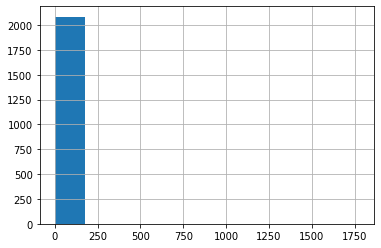

In [634]:
analyze_df.rating.hist();

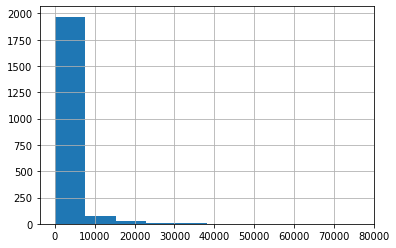

In [635]:
analyze_df.retweet_count.hist();

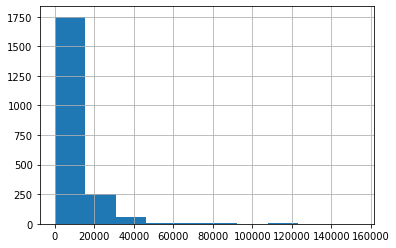

In [636]:
analyze_df.favorite_count.hist();

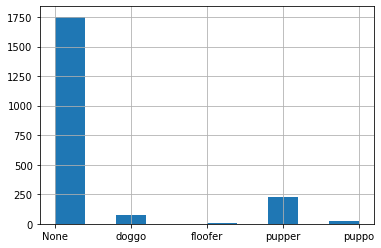

In [637]:
analyze_df.dogs_stage.hist();

##### Scatterplots of various features

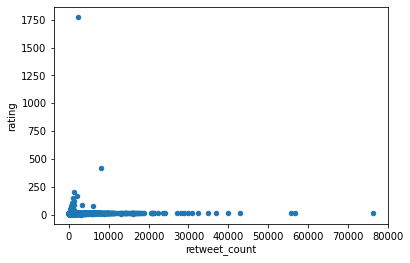

In [638]:
analyze_df.plot(x='retweet_count',y='rating',kind='scatter');

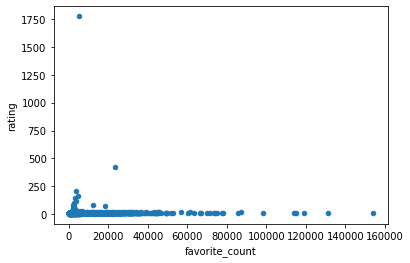

In [639]:
analyze_df.plot(x='favorite_count',y='rating',kind='scatter');

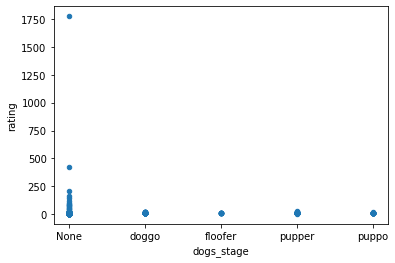

In [657]:
analyze_df.plot(x='dogs_stage',y='rating',kind='scatter');

In [643]:
analyze_df['dogs_stage'].sort_values()

0        None
1175     None
1174     None
1173     None
1172     None
        ...  
2063    puppo
2062    puppo
2084    puppo
2072    puppo
2085    puppo
Name: dogs_stage, Length: 2086, dtype: object

In [644]:
# The mean 'ratings' for every dog stage 'dogs_stage'
analyze_df.groupby(['dogs_stage'])['rating'].mean().sort_values(ascending=False)

dogs_stage
None       12.389840
puppo      12.041667
doggo      11.830986
floofer    11.800000
pupper     10.820961
Name: rating, dtype: float64

In [647]:
list(analyze_df)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating',
 'rating_denominator',
 'name',
 'dogs_stage',
 'retweet_count',
 'favorite_count',
 'image_url',
 'prediction',
 'confidence',
 'breed']

In [651]:
# Display dog breeds are predicted
breeds = analyze_df[analyze_df.breed == True]
breeds.prediction.value_counts()

golden retriever      126
Labrador retriever     87
Pembroke               87
Chihuahua              74
pug                    52
                     ... 
groenendael             1
Scotch terrier          1
clumber                 1
Japanese spaniel        1
standard schnauzer      1
Name: prediction, Length: 111, dtype: int64

In [652]:
# Display dog breeds are not predicted
breeds = analyze_df[analyze_df.breed == False]
breeds.prediction.value_counts()

seat belt           20
teddy               17
web site            14
dingo                8
tennis ball          8
                    ..
cowboy boot          1
shopping basket      1
desktop computer     1
bald eagle           1
mousetrap            1
Name: prediction, Length: 257, dtype: int64

In [654]:
# Display dog breeds are predicted with the highest 10 arithmetic mean for favorite (like) counts 
breeds.groupby('prediction')['favorite_count'].mean().sort_values(ascending = False).head(10)

prediction
conch         43658.0
Angora        42991.5
limousine     42967.0
fountain      41283.0
bubble        37676.5
orange        35729.0
beaver        35217.0
revolver      32166.0
barbell       32099.0
basketball    31970.0
Name: favorite_count, dtype: float64

In [655]:
# Display dog breeds are predicted with the highest 10 arithmetic mean for retweet counts 
breeds.groupby('prediction')['retweet_count'].mean().sort_values(ascending = False).head(10)

prediction
conch             17490.0
bubble            15065.5
gondola           14504.0
Angora            14217.0
beaver            14049.0
revolver          12750.0
remote control    12539.0
quilt             10798.0
limousine         10567.0
barbell            9524.0
Name: retweet_count, dtype: float64

In [656]:
# Display the arithmetic mean for dogs stage
analyze_df.groupby(['dogs_stage'])['rating'].mean().sort_values(ascending = False)

dogs_stage
None       12.389840
puppo      12.041667
doggo      11.830986
floofer    11.800000
pupper     10.820961
Name: rating, dtype: float64